In [1]:
import os
import torch
import numpy as np
from imageio import imread
import matplotlib.pyplot as plt

def read_flow(path):
    file = open(path)
    magic = np.fromfile(file, np.float32, count=1)
    flow = None
    if 202021.25 != magic:
        print ('Magic number incorrect. Invalid .flo file')
    
    
    else:  
        w = np.fromfile(file, np.int32, count=1)[0]
        h = np.fromfile(file, np.int32, count=1)[0]
        flow = np.fromfile(file, np.float32, count=2 * w * h)
        flow = torch.Tensor(np.resize(flow, (h, w, 2)))
    return flow

def read_image(path):
    img = torch.Tensor(imread(path))
    return img

def optical_flow_importer(path):
    flows = []
    for f_name in sorted(os.listdir(path)):
        flow_path = os.path.join(path, f_name)
        flow = torch.Tensor(read_flow(flow_path))   
        flows.append(flow)
    flows = torch.stack(flows, dim=0)
    u = flows[..., 0].view(299, -1)
    v = flows[..., 1].view(299, -1)
    u -= torch.min(u, dim=-1, keepdim=True)[0]
    u /= torch.max(u, dim=-1, keepdim=True)[0]
    u *= 100
    v -= torch.min(v, dim=-1, keepdim=True)[0]
    v /= torch.max(v, dim=-1, keepdim=True)[0]
    v *= 100

    u = u.view(-1).type(torch.int32).tolist()
    v = v.view(-1).type(torch.int32).tolist()
    return u, v

def video_clip_importer(path):
    images = []
    for f_name in sorted(os.listdir(path)):
        image_path = os.path.join(path, f_name)
        image = read_image(image_path)   
        images.append(image)
    images = torch.stack(images, dim=0).view(500, -1)
    images -= torch.min(images, dim=-1, keepdim=True)[0]
    images /= torch.max(images, dim=-1, keepdim=True)[0]
    images *= 100
    return images.view(-1).type(torch.int32).tolist()

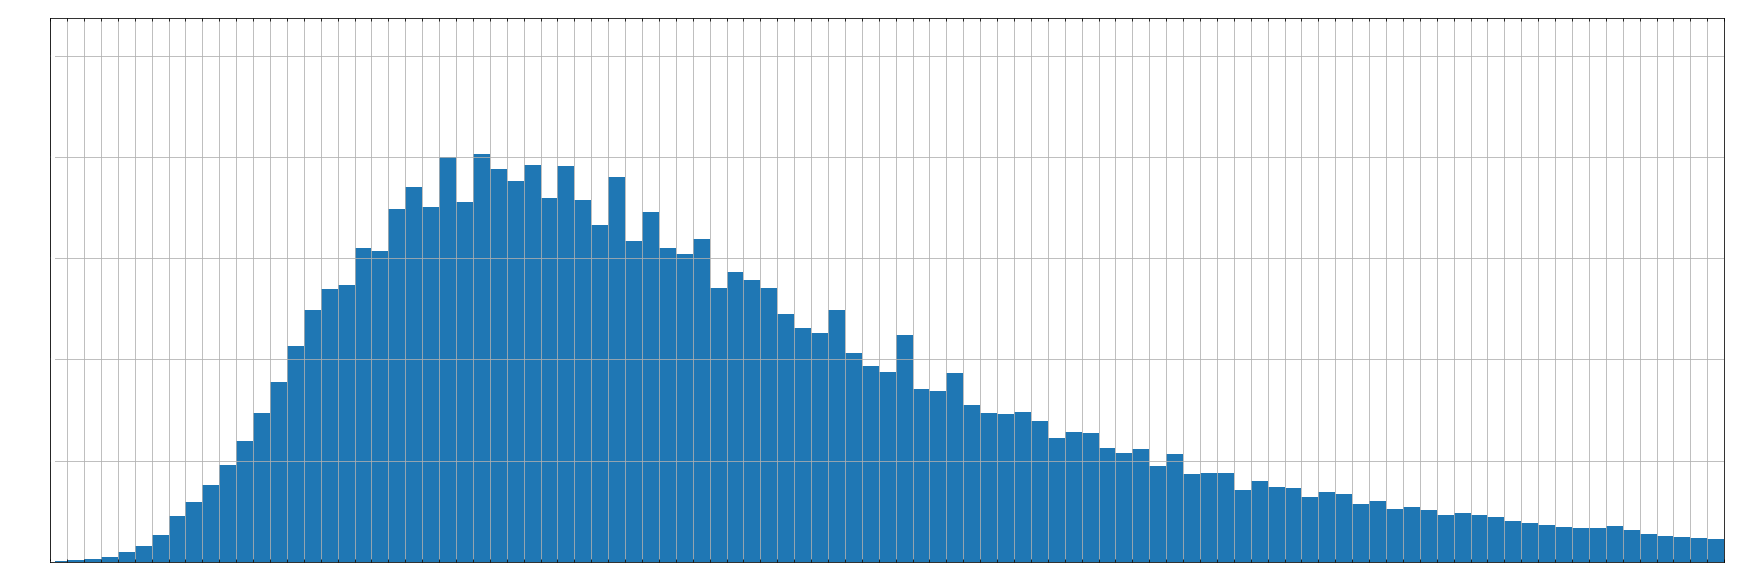

In [4]:
video_path = '/data_cuda_ssd/minsu/TEST_hyungjae/train/Contam/10/10-2/'
weight = video_clip_importer(video_path)
sample_name = '_'.join(video_path.replace(" ", "").split('/')[4:])
f_name = 'histogram_video_{}'.format(sample_name[:-1])
xticks = [i for i in range(100)]

plt.figure(figsize=(30,10))
plt.tick_params(axis='x', direction='in', length=3, pad=6, labelsize=10, labelcolor='white', top=True)
plt.tick_params(axis='y', direction='inout', length=10, pad=6, labelsize=20, labelcolor='white', width=2, color='w')
plt.xlim(0, 99)
plt.xticks(xticks)
plt.hist(weight, bins=100)
plt.grid(True)
plt.show()
#plt.savefig(f_name + '.png')
#plt.close()

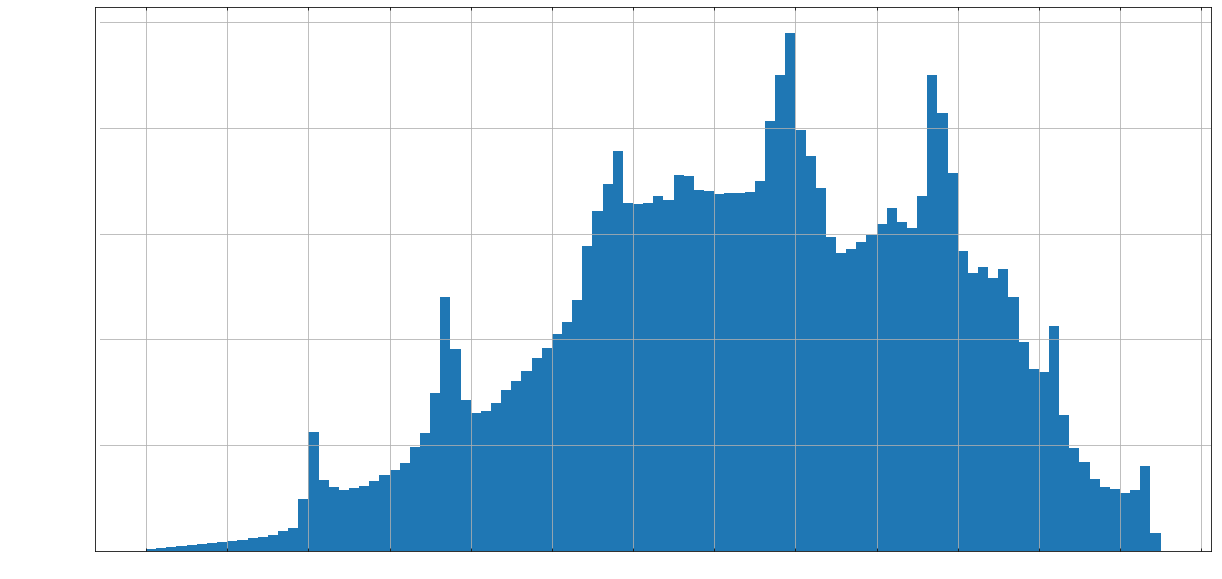

In [8]:
flow_path = '/data_cuda_ssd/minsu/OpticalFlow_CJ_DATA/train/050/50-2/'
u, v = optical_flow_importer(flow_path)
sample_name = '_'.join(flow_path.replace(" ", "").split('/')[4:])
f_name = 'histogram_flow_{}'.format(sample_name[:-1])

xticks = [8*i for i in range(33)]
plt.figure(figsize=(20,10))
plt.tick_params(axis='x', direction='in', length=3, pad=6, labelsize=15, labelcolor='white', top=True)
plt.tick_params(axis='y', direction='inout', length=10, pad=6, labelsize=20, labelcolor='white', width=2, color='w')
plt.xticks(xticks)
plt.hist(u, bins=100)
plt.grid(True)
plt.show()

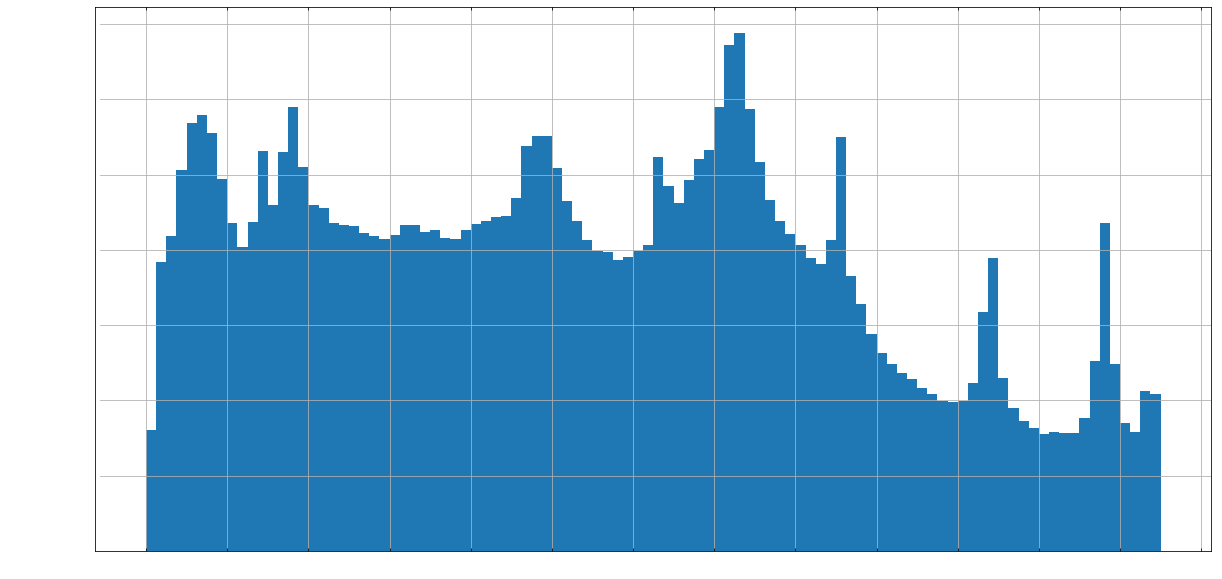

In [9]:
xticks = [8*i for i in range(33)]

plt.figure(figsize=(20,10))
plt.tick_params(axis='x', direction='in', length=3, pad=6, labelsize=15, labelcolor='white', top=True)
plt.tick_params(axis='y', direction='inout', length=10, pad=6, labelsize=20, labelcolor='white', width=2, color='w')
plt.xticks(xticks)
plt.hist(v, bins=100)
plt.grid(True)
plt.show()